In [39]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [21]:
import numpy as np
import pandas as pd
import datetime as dt

from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func , inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [9]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [11]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [16]:
# Find the most recent date in the data set.
#for row in session.query(Measurement.date).first():
    #print(row)

last_date = session.query(func.max(Measurement.date)).scalar()
print(last_date)

2017-08-23


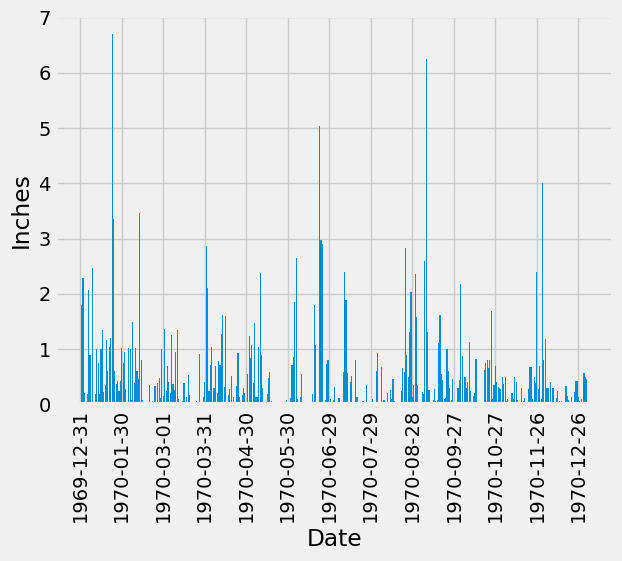

In [86]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
first_date = datetime(2016,8,22)
last_date = datetime(2017,8,23)

# Perform a query to retrieve the data and precipitation scores
year_data = session.query(Measurement.date, Measurement.prcp).filter(
    Measurement.date <= last_date,Measurement.date >= first_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

data = [(row.date, row.prcp) for row in year_data]
year_df = pd.DataFrame(data, columns = ['date','prcp'])

# Sort the dataframe by date

year_df = year_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(year_df['date'],year_df['prcp'])
plt.xlabel('Date')
plt.ylabel('Inches')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
plt.xticks(rotation=90)
plt.show()



In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [58]:
# Design a query to calculate the total number of stations in the dataset
stations_count = session.query(func.count(func.distinct(Measurement.station))).scalar()
print(stations_count)

9


In [63]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

M_A_S = session.query(Measurement.station,func.count(Measurement.station)
                     ).group_by(Measurement.station
                               ).order_by(func.count(Measurement.station
                                                    ).desc()).all()

for station, count in M_A_S:
    print(station, count)

USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [70]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
F_S = session.query(Measurement.station, func.max(Measurement.tobs), func.min(Measurement.tobs), func.avg(Measurement.tobs) ).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
print(F_S)

('USC00519281', 85.0, 54.0, 71.66378066378067)


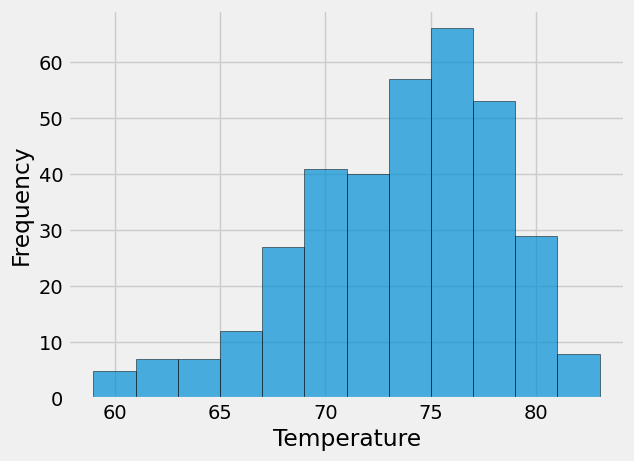

In [87]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
m_a_s = 'USC00519281'
PLT_D = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == m_a_s).filter(Measurement.date >= '2016-08-23').all()
PLT_DF = pd.DataFrame(PLT_D, columns=['date', 'temperature'])
PLT_DF['date'] = pd.to_datetime(PLT_DF['date'])

plt.hist(PLT_DF['temperature'], bins=12, alpha=0.7, edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [88]:
# Close Session
session.close()